### n-gram

    - n-gram : 주어진 문장에서 n개의 연속적인 단어 시퀀스(단어 나열)
    - n개의 단어를 토큰으로 사용함
    - 이웃한 단어의 출현 횟수를 통계적으로 표현해 텍스트 유사도를 계산
    - 손쉬운 구현 방식에 비해 학습 말뭉치 품질이 좋으면 좋은 성능을 보임
    - 서로 다른 문장을 n-gram으로 비교하여 단어의 출현 빈도에 기반한 유사도 계산
      : 이를 이용해 논문 인용이나 도용 정도를 조사
      

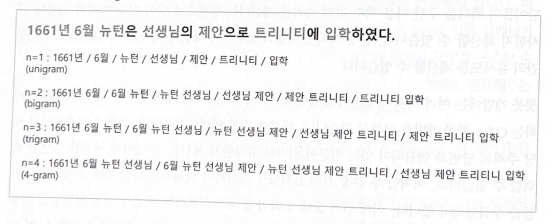



    - n이 1인 경우 1-gram : 유니그램(unigram)
    - n이 2인 경우 2-gram : 바이그램(bigram)
    - n이 3인 경우 3-gram : 트라이그램(trigram)
    - 4 이상은 숫자만 앞쪽에 붙여 부름

**`2-gram 예시`**

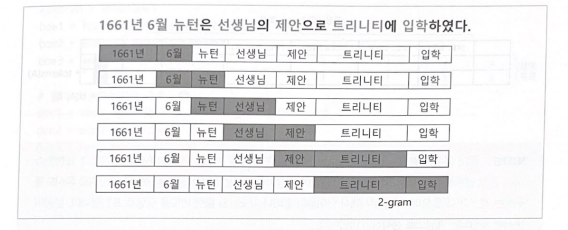

    - n-gram을 이용해 문장 간 유사도 계산
    - 문장을 n-gram으로 토큰을 분리한 후 단어 문서 행렬(Term-Documetn Matrix, TDM 만듦)
    - 이후 두 문장을 서로 비교해 동일한 단어의 출현 빈도를 확률로 계산해 유사도 구함
    - 두 문장을 A와 B로 표현했을 때 B가 A와 얼마나 유사한지 확률을 구함
    
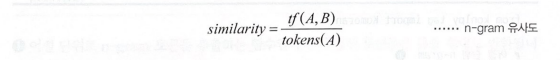

    - tf(term frequency)는 두 문장 A와 B에서 동일한 토큰의 출현 빈도
    - tokens는 해당 문장에서 전체 토큰의 수(토큰 : n-gram으로 분리된 단어)
    - 기준이 되는 문장 A에서 나온 전체 토큰 중에서 A와 B에 동일한 토큰이 얼마나 있는지 비율로 표현
    - 1.0에 가까울수록 B가 A에 유사함
    
**`2-gram 이용 두 문장 유사도 계산`**

    - A : 6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.
    - B : 6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.
    
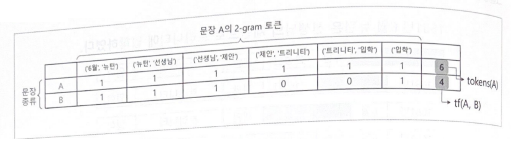  
 
    - 위 그림은 문장 A와 B의 단어 문서 행렬을 표현한 표
    - 행렬의 열은 문장 A의 2-gram 토큰 값
    - 행렬의 행은 문장 A와 B로 구성됨
    - 열에 나열된 토큰들이 문장 A와 B에 얼마나 출현되고 있는지 나타내고 있음
    - 문장 A에서는 6개의 토큰이 나오고, 문장 B에서는 동일한 토큰이 4개 카운트됨
    - n-gram 유사도 수식에 따르면 4/6으로 0.66 유사도를 지님
      => 문장 B는 문장 A와 66% 유사함

### **`n-gram 구현`**

In [2]:
from konlpy.tag import Komoran

In [3]:
komoran = Komoran()

In [22]:
# 문장 정의

s1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다'
s2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다'
s3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었다'

In [21]:
# 형태소 분석기에서 명사(단어) 추출

bow1 = komoran.nouns(s1)
print(b1)
bow2 = komoran.nouns(s2)
print(b2)
bow3 = komoran.nouns(s3)
print(b3)

['6월', '뉴턴', '선생님', '제안', '트리니티', '입학']
['6월', '뉴턴', '선생님', '제안', '대학교', '입학']
['밥', '뉴턴', '선생', '님과 함께']


In [18]:
text = tuple(bow1)
text

('6월', '뉴턴', '선생님', '제안', '트리니티', '입학')

In [19]:
[text[x:x+2] for x in range(0, len(text))]

[('6월', '뉴턴'),
 ('뉴턴', '선생님'),
 ('선생님', '제안'),
 ('제안', '트리니티'),
 ('트리니티', '입학'),
 ('입학',)]

In [23]:
# 어절 단위 n-gram

def word_ngram(bow, num_gram):
    text = tuple(bow)
    ngrams = [text[x:x +num_gram] for x in range(0, len(text))]
    return tuple(ngrams)

In [24]:
# 단어 n-gram 추출 

doc1 = word_ngram(bow1, 2)
doc2 = word_ngram(bow2, 2)
doc3 = word_ngram(bow3, 2)

print(doc1)
print(doc2)
print(doc3)

(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '트리니티'), ('트리니티', '입학'), ('입학',))
(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '대학교'), ('대학교', '입학'), ('입학',))
(('밥', '뉴턴'), ('뉴턴', '선생'), ('선생', '님과 함께'), ('님과 함께',))


In [28]:

# 유사도 계산
def similarity(doc1, doc2):
    cnt = 0
    for token in doc1:
        if token in doc2:
            cnt = cnt+1
            
    return cnt/len(doc1)

In [29]:
# 유사도 계산
r1 = similarity(doc1, doc2)
r2 = similarity(doc3, doc1)
r3 = similarity(doc2, doc3)

# 계산된 유사도 출력

print(r1)
print(r2)
print(r3)

0.6666666666666666
0.0
0.0


    - n-gram은 문장에 존재하는 모든 단어의 출현 빈도를 확인하는 겅시 아니라,
    연속되는 문장에서 일부 단어(n으로 설정된 개수만큼)만 확인하다 보니 전체 문장을 고려한 언어 모델보다 정확도가 떨어질 수 있음
    - n-gram의 경우 n을 크게 잡을수록 비교 문장의 토큰과 비교할 때 카운트를 놓칠 확률이 커짐
      그러나, n을 작게 잡을수록 카운트 확률을 높아지지만 문맥을 파악하는 정확도는 떨어질 수 밖에 없는 구조로,
      n-gram 모델에서 n의 설정은 매우 중요함(보통 1~5 사이의 값을 많이 사용)
    - 위에서는 어절 단위의 n-gram 모델이지만 음절 단위의 n-gram 모델도 존재함
      : 학습 말뭉치 종류와 그 양에 따라 성능이 크게 차이나서, 일반적으로 학습 데이터가 작을 때는
       음절 단위의 n-gram 모델이 유리하지만 문맥을 파악하는 정확도는 떨어질 수 있음
     
     

### 코사인 유사도


    - 단어나 문장을 벡터로 표현하여 이 벡터간 거리나 각도를 이용해 유사성을 파악할 수 있음
    - 벡터 간 거리나 각도를 이용해 유사성을 파악하는 `코사인 유사도(cosine similarity)`
    - 코사인 유사도는 두 벡터 간 코사인 각도를 이용해 유사도를 측정함
    - 벡터의 크기가 중요하지 않을 때 그 거리를 측정하기 위하여 사용함
      예를 들어 단어의 출현 빈도를 통해 유사도 계산을 한다면, 동일한 단어가 많이 포함되어 있을 수록 벡터의 크기가 커짐
      이 때 코사인 유사도는 벡터의 크기와 상관없이 결과가 안정적임
     - n-gram의 경우 동일한 단어가 문서 내 자주 등장하면 유사도 결과에 안 좋은 영향을 미칠 수 밖에 없음
     - 코사인 유사도는 다양한 차원에서 적용 가능해 실무에서 많이 사용함
     - -1~1 사이의 값을 가지며, 두 벡터의 방향이 완전히 동일한 경우에는 1, 반대 방향인 경우에는 -1, 서로 직각이면 0
      -> 두 벡터의 방향이 같아질수록 유사함
      
      
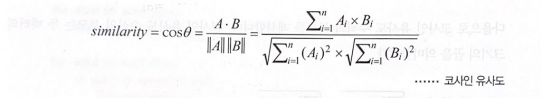  


    문장 A와 B에서 단어 토큰(명사)만 추출하여 단어 문서 행렬을 표현한 표 
    
    - A : 6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.
    - B : 6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.
    
    문장 A와 B에서 단어 토큰(명사)만 추출하여 단어 문서 행렬을 표현한 표
    행렬의 열은 문장 A와 B의 단어 토큰값,
    행렬의 행은 문장 A와 B로 구성됨
    나열된 토큰은 문장 A와 B에 얼마만큼 출현되는지 나타남 
    각 문장에서 토큰이 나올 때 마다 +1 씩 카운트
    
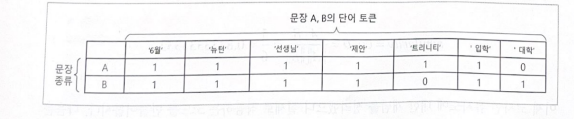
    

    - 문장 A와 B의 벡터는 다음과 같이 정의됨
    A = [1,1,1,1,1,1,0]
    B = [1,1,1,1,0,1,1]
    
    
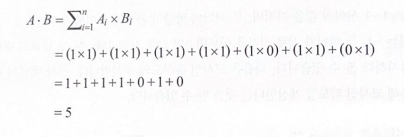    

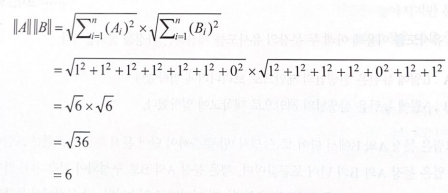

     코사인 유사도 수식의 분자(두 벡터의 내적), 수식의 분모(두 벡터의 크기의 곱)
     -> 두 벡터의 내적은 5, 두 벡터 크기의 곱 6 => 코사인 각도 0.83 (83%의 유사성)

### **`cosin_similarity 구현`**

In [30]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [33]:
s1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.'
s2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.'
s3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었다.'

In [36]:
komoran = Komoran()
bow1 = komoran.nouns(s1)
bow2 = komoran.nouns(s2)
bow3 = komoran.nouns(s3)

print(bow1)
print(bow2)
print(bow3)

['6월', '뉴턴', '선생님', '제안', '트리니티', '입학']
['6월', '뉴턴', '선생님', '제안', '대학교', '입학']
['밥', '뉴턴', '선생', '님과 함께']


In [37]:
# 단어 묶음 리스트를 하나로 합침

bow = bow1+bow2+bow3
print(bow)

['6월', '뉴턴', '선생님', '제안', '트리니티', '입학', '6월', '뉴턴', '선생님', '제안', '대학교', '입학', '밥', '뉴턴', '선생', '님과 함께']


In [38]:
# 단어 묶음에서 중복을 제거해 사전 구축

word_dics = []

for token in bow:
    if token not in word_dics:
        word_dics.append(token)
        
print(word_dics)

['6월', '뉴턴', '선생님', '제안', '트리니티', '입학', '대학교', '밥', '선생', '님과 함께']


In [40]:
list(set(bow))

['제안', '6월', '밥', '입학', '대학교', '님과 함께', '뉴턴', '트리니티', '선생', '선생님']

In [32]:
# 코사인 유사도 계산

def cos_sim(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [41]:
# TDM 만들기

def make_term_doc_mat(sentence_bow, word_dics):
    freq_mat = {}
    
    for word in word_dics:
        freq_mat[word] = 0
    for word in word_dics:
        if word in sentence_bow:
            freq_mat[word] +=1
            
    return freq_mat
        

In [48]:
#문장별 단어 문서 행렬 계산

freq_list1 = make_term_doc_mat(bow1, word_dics)
print(freq_list1)

freq_list2 = make_term_doc_mat(bow2, word_dics)
print(freq_list2)


freq_list3 = make_term_doc_mat(bow3, word_dics)
print(freq_list3)

{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 1, '입학': 1, '대학교': 0, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 0, '입학': 1, '대학교': 1, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 0, '뉴턴': 1, '선생님': 0, '제안': 0, '트리니티': 0, '입학': 0, '대학교': 0, '밥': 1, '선생': 1, '님과 함께': 1}


In [49]:
# 단어 벡터 만들기

def make_vector(tdm):
    vec = []
    for key in tdm:
        vec.append(tdm[key])
    return vec

In [52]:
# 문장 벡터 생성

doc1 = np.array(make_vector(freq_list1))
doc2 = np.array(make_vector(freq_list2))
doc3 = np.array(make_vector(freq_list3))

print(doc1)
print(doc2)
print(doc3)

[1 1 1 1 1 1 0 0 0 0]
[1 1 1 1 0 1 1 0 0 0]
[0 1 0 0 0 0 0 1 1 1]


In [53]:
# 코사인 유사도 계산

r1 = cos_sim(doc1, doc2)
r2 = cos_sim(doc3, doc1)
r3 = cos_sim(doc2, doc3)

print(r1)
print(r2)
print(r3)

0.8333333333333335
0.20412414523193154
0.20412414523193154


    - 코사인 유사도 계산은 numpy의 벡터 내적 계싼하는 함수와 노름(norm) 계산하는 함수 이용
     넘파이 패키지의 dot() 함수는 인자로 들어온 2개의 넘파이 배열을 내적곱(dot product)함
     norm() 함수로 벡터의 크기를 나타내는 노름 계산 (코사인 유사도에서는 L2 노름인 유클리드 노름 사용)
     
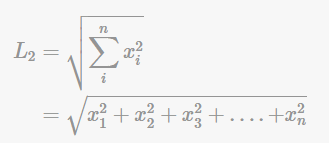

